# Overview

<b>Diabetes</b> is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. Insulin is a hormone that regulates blood glucose.

#### Symptoms:

- feeling very thirsty
- needing to urinate more often than usual
- blurred vision
- feeling tired
- losing weight unintentionally

#### Effects:

- <b>Hyperglycaemia</b>, also called raised blood glucose or raised blood sugar, is a common effect of uncontrolled diabetes and over time leads to serious damage to many of the body's systems, especially the nerves and blood vessels.
- People with diabetes have a higher risk of health problems including heart attack, stroke and kidney failure.
- Diabetes can cause permanent vision loss by damaging blood vessels in the eyes.
- Many people with diabetes develop problems with their feet from nerve damage and poor blood flow. This can cause foot ulcers and may lead to amputation.

<i>Reference : https://www.who.int/news-room/fact-sheets/detail/diabetes#:~:text=Overview,hormone%20that%20regulates%20blood%20glucose</i>

# Objective:

The objective of this project is to build a machine learning model which will predict whether a patient has diabetes or not based on some diagonostic measurements such as glucose, blood pressure, insulin level, age and so on.

# About Dataset

#### Pima Indians Diabetes Database

- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
- The dataset consists of several medical predictor variables and one target variable, Outcome.
- Predictor variables include:
    - <b>Pregnancies</b> : No. of times pregnant
    - <b>Glucose</b> : Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
    - <b>BloodPressure</b> : Diastolic blood pressure (mm Hg)
    - <b>SkinThickness</b> : Triceps skin fold thickness (mm)
    - <b>Insulin</b> : 2-Hour serum insulin (muU/ml)
    - <b>BMI</b> : Body Mass Index (weight in kg / (height in m)^2)
    - <b>DiabetesPedigreeFunction</b>: Diabetes pedigree function
    - <b>Age</b> : Age in years
- Outcome : Class variable (0 => non-diabetic & 1 => diabetic)
- Total no. of observations : 768
- Total no. of variables : 9

<i>Dataset URL : https://www.kaggle.com/datasets/uciml/Pima-indians-diabetes-database</i>

# Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

# Data Collection and Analysis

In [3]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('./dataset/diabetes.csv')

In [4]:
# printing the first 5 rows  of the dataset
diabetes_dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
# number of rows and columns
diabetes_dataset.shape

(768, 9)

In [6]:
# This shows the dataset consists of 768 observations and 9 variables.

In [7]:
# getting the statistical measures of the dataset
diabetes_dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
# The minimum age of the patients is 21 and maximum age is 81.

In [9]:
# data-type of features
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# 7 variables are of integer type and 2 variables are of float type.

In [11]:
# checking for null values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# checking for duplicate values
diabetes_dataset[diabetes_dataset.duplicated()]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

In [13]:
# There are no duplicate values.

In [14]:
# distribution of the outcome variable
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [15]:
# There are 500 non-diabetic observations and 268 diabetic observations.

In [16]:
diabetes_dataset['Outcome'].value_counts()*100/len(diabetes_dataset)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [17]:
# 65% of the observations are non-diabetic and 35% are diabetic.
# This ia an unbalanced dataset.

In [18]:
diabetes_dataset.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

# Data Visualization

### Countplot

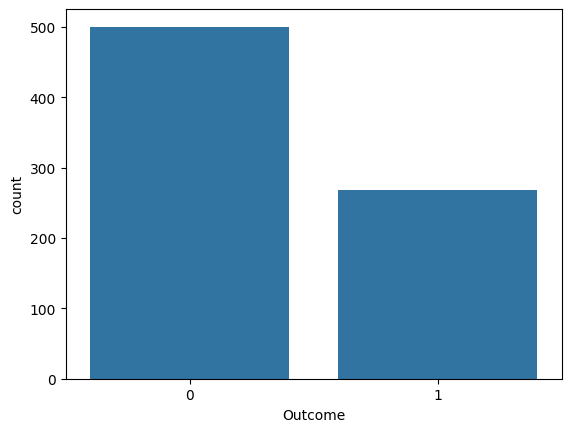

In [19]:
sns.countplot(x='Outcome',data=diabetes_dataset)
plt.show()

### Pie Plot

<Axes: ylabel='count'>

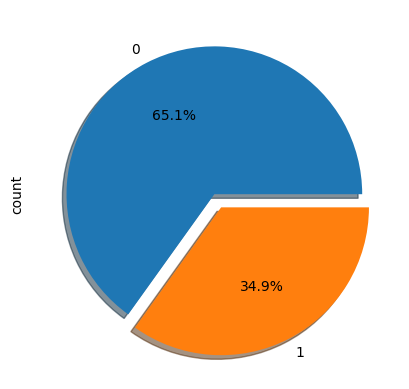

In [20]:
diabetes_dataset['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

### Histogram

In [21]:
df = diabetes_dataset.drop(columns='Outcome',axis=1)

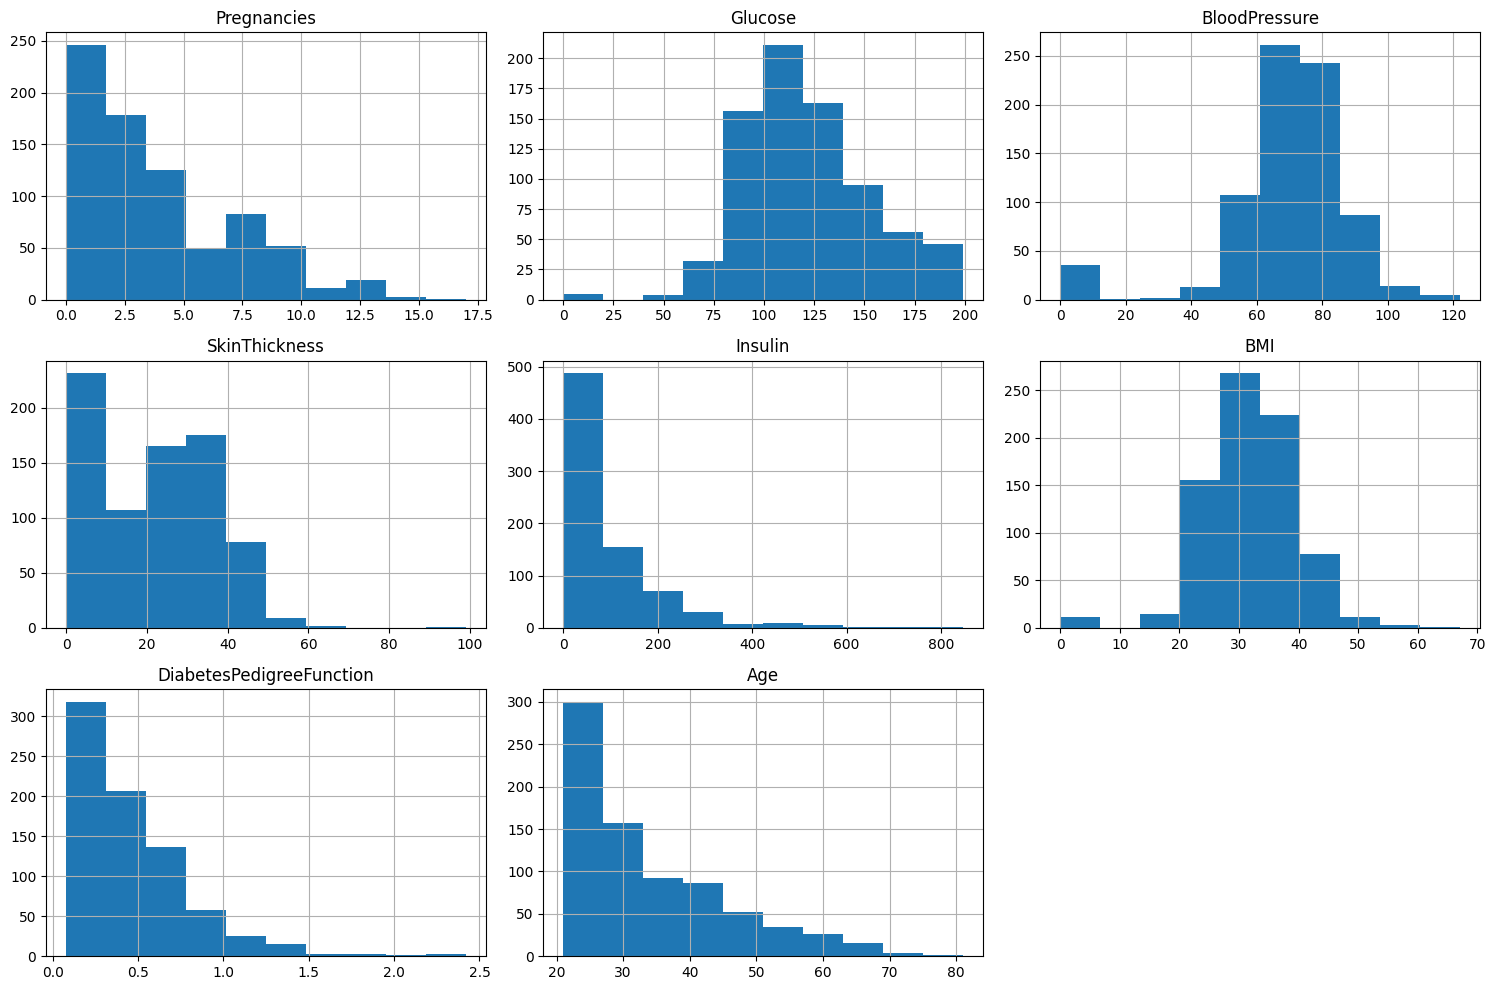

In [22]:
df.hist(bins=10, figsize=(15,10))
plt.tight_layout()
plt.show()

### Scatter Plot

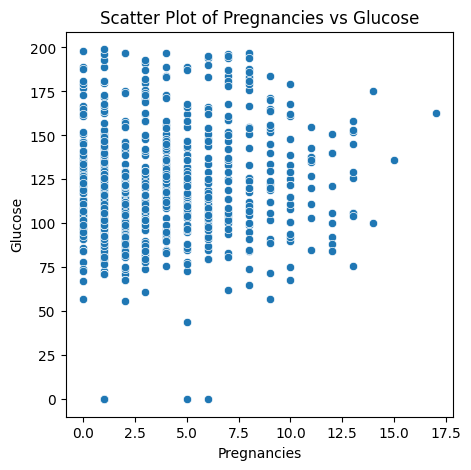

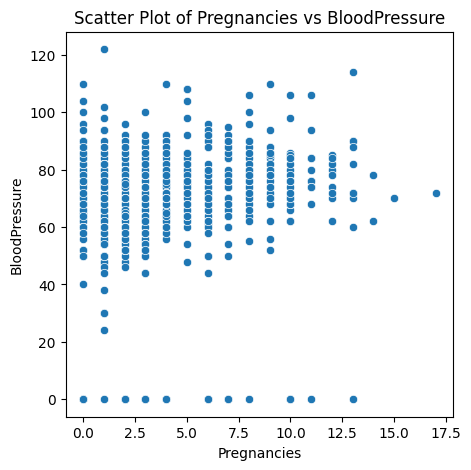

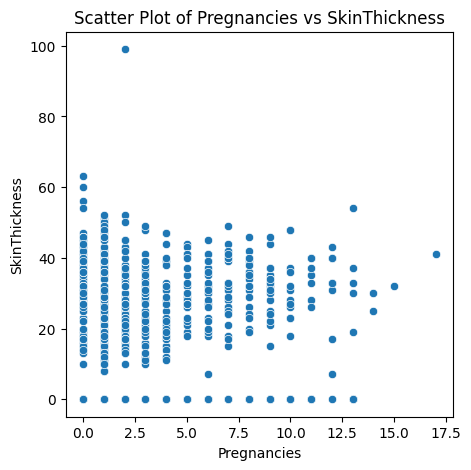

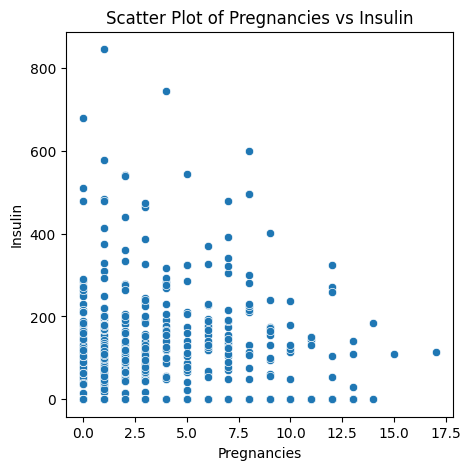

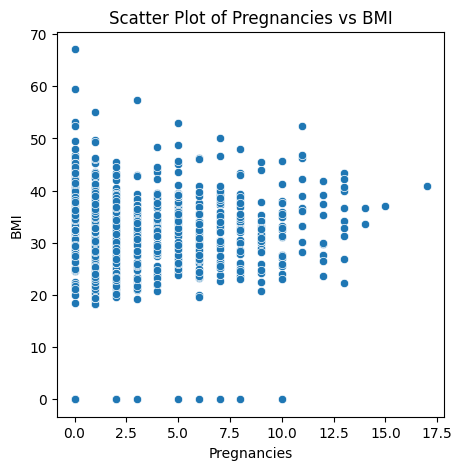

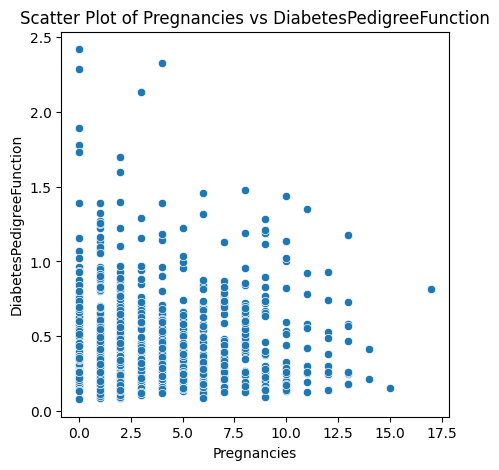

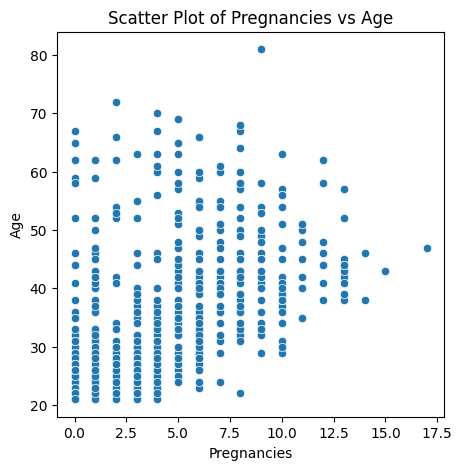

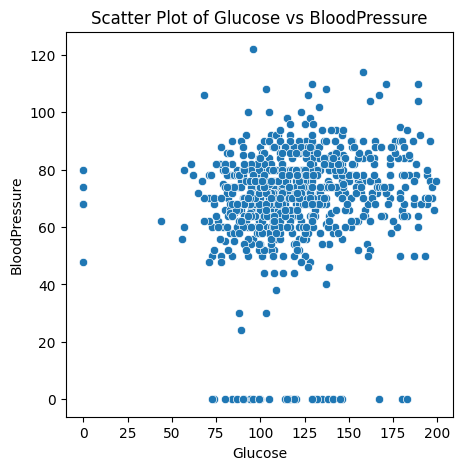

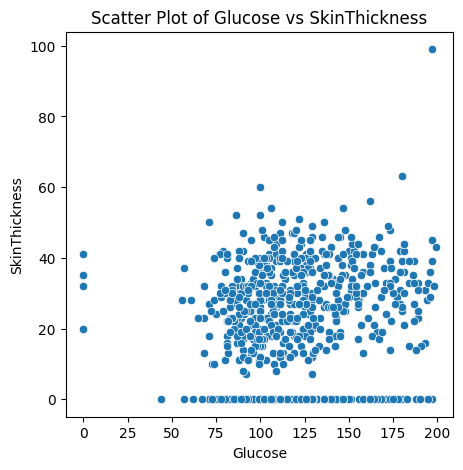

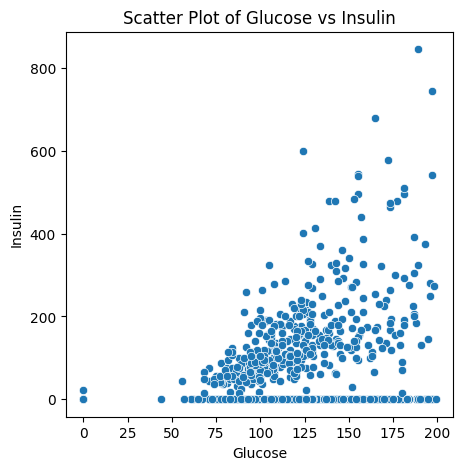

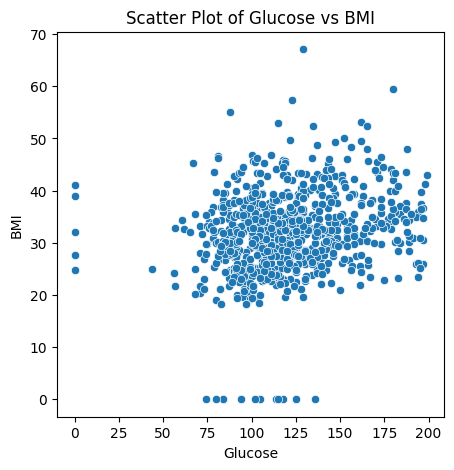

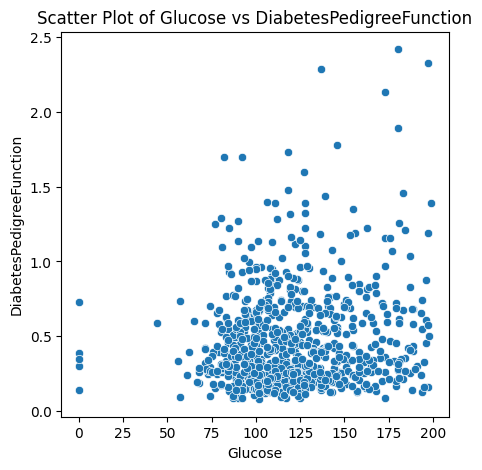

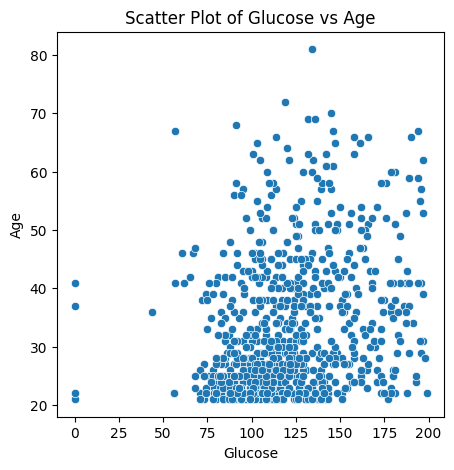

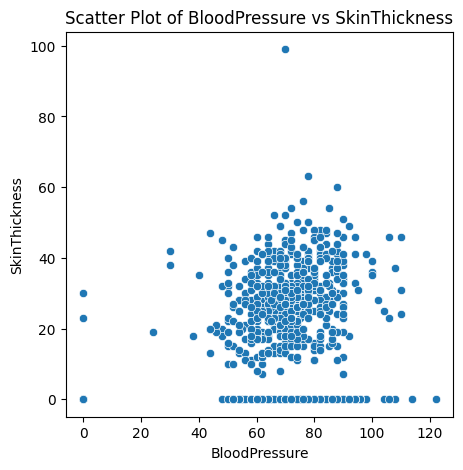

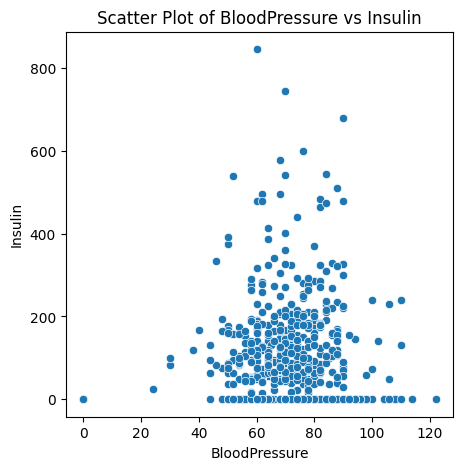

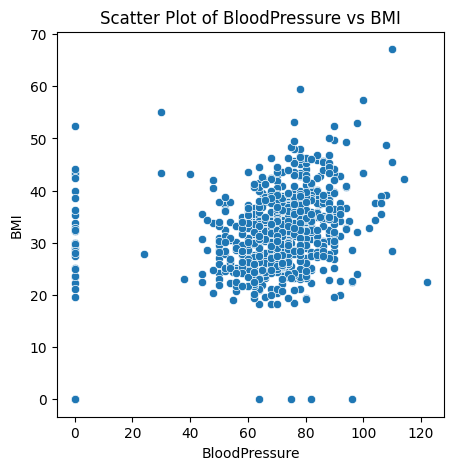

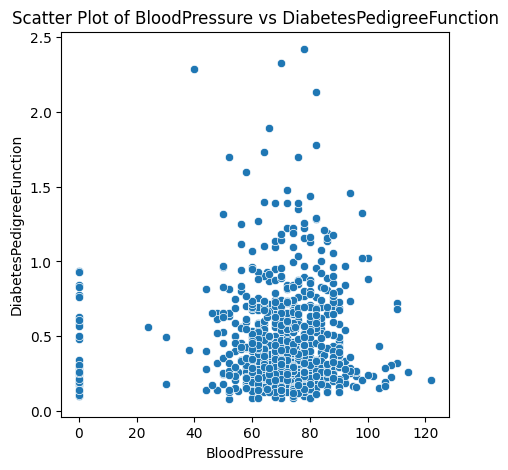

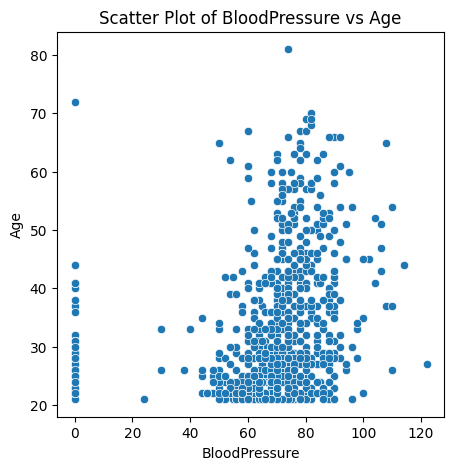

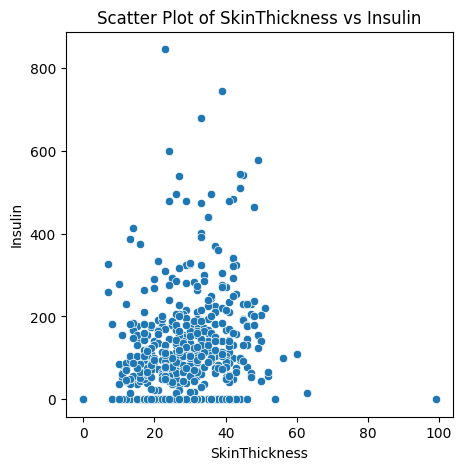

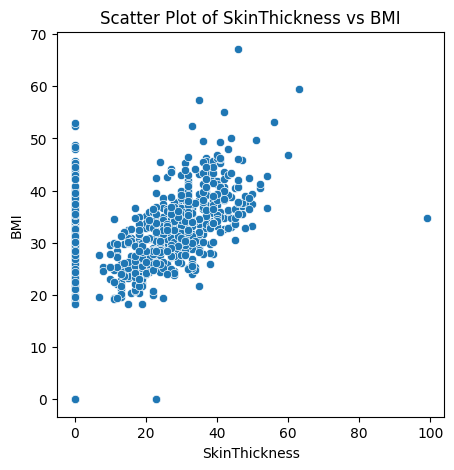

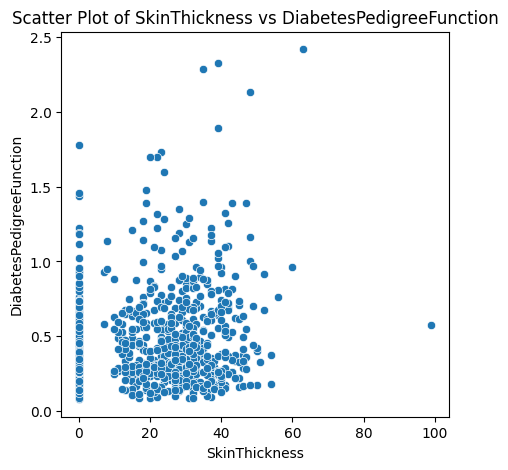

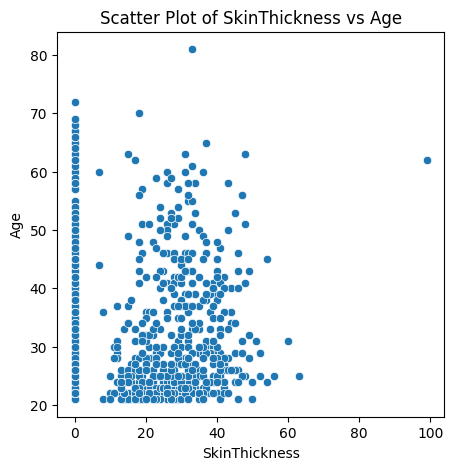

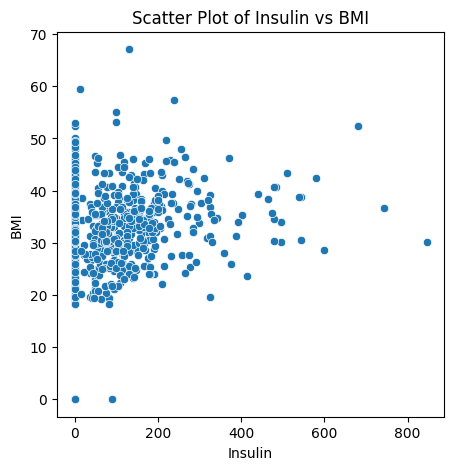

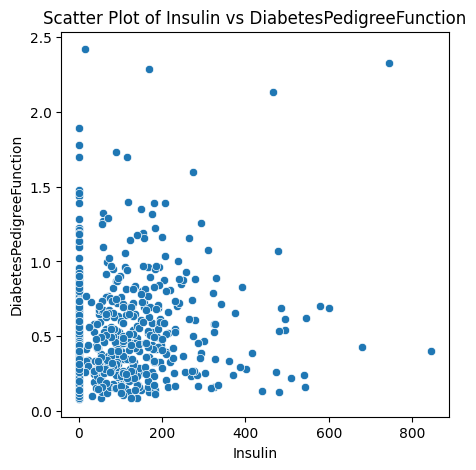

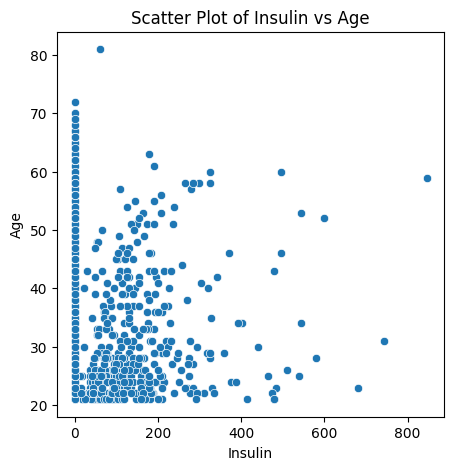

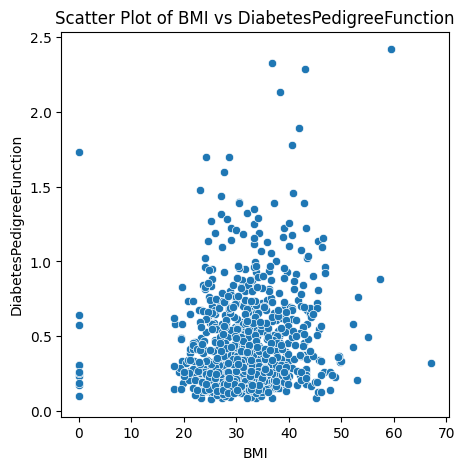

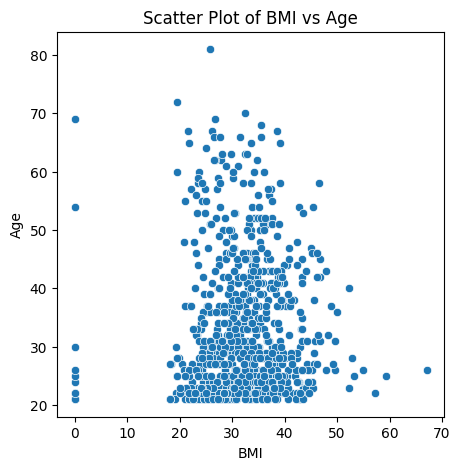

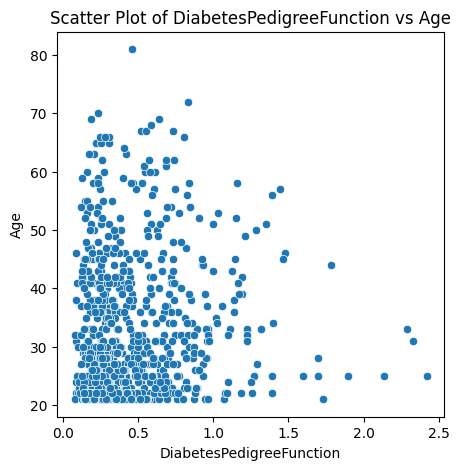

In [23]:
columns = df.columns

for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        plt.figure(figsize=(5,5))
        sns.scatterplot(x=df[columns[i]],y=df[columns[j]])
        plt.title(f'Scatter Plot of {columns[i]} vs {columns[j]}')
        plt.xlabel(f'{columns[i]}')
        plt.ylabel(f'{columns[j]}')
        plt.show()
    

### Pair Plot

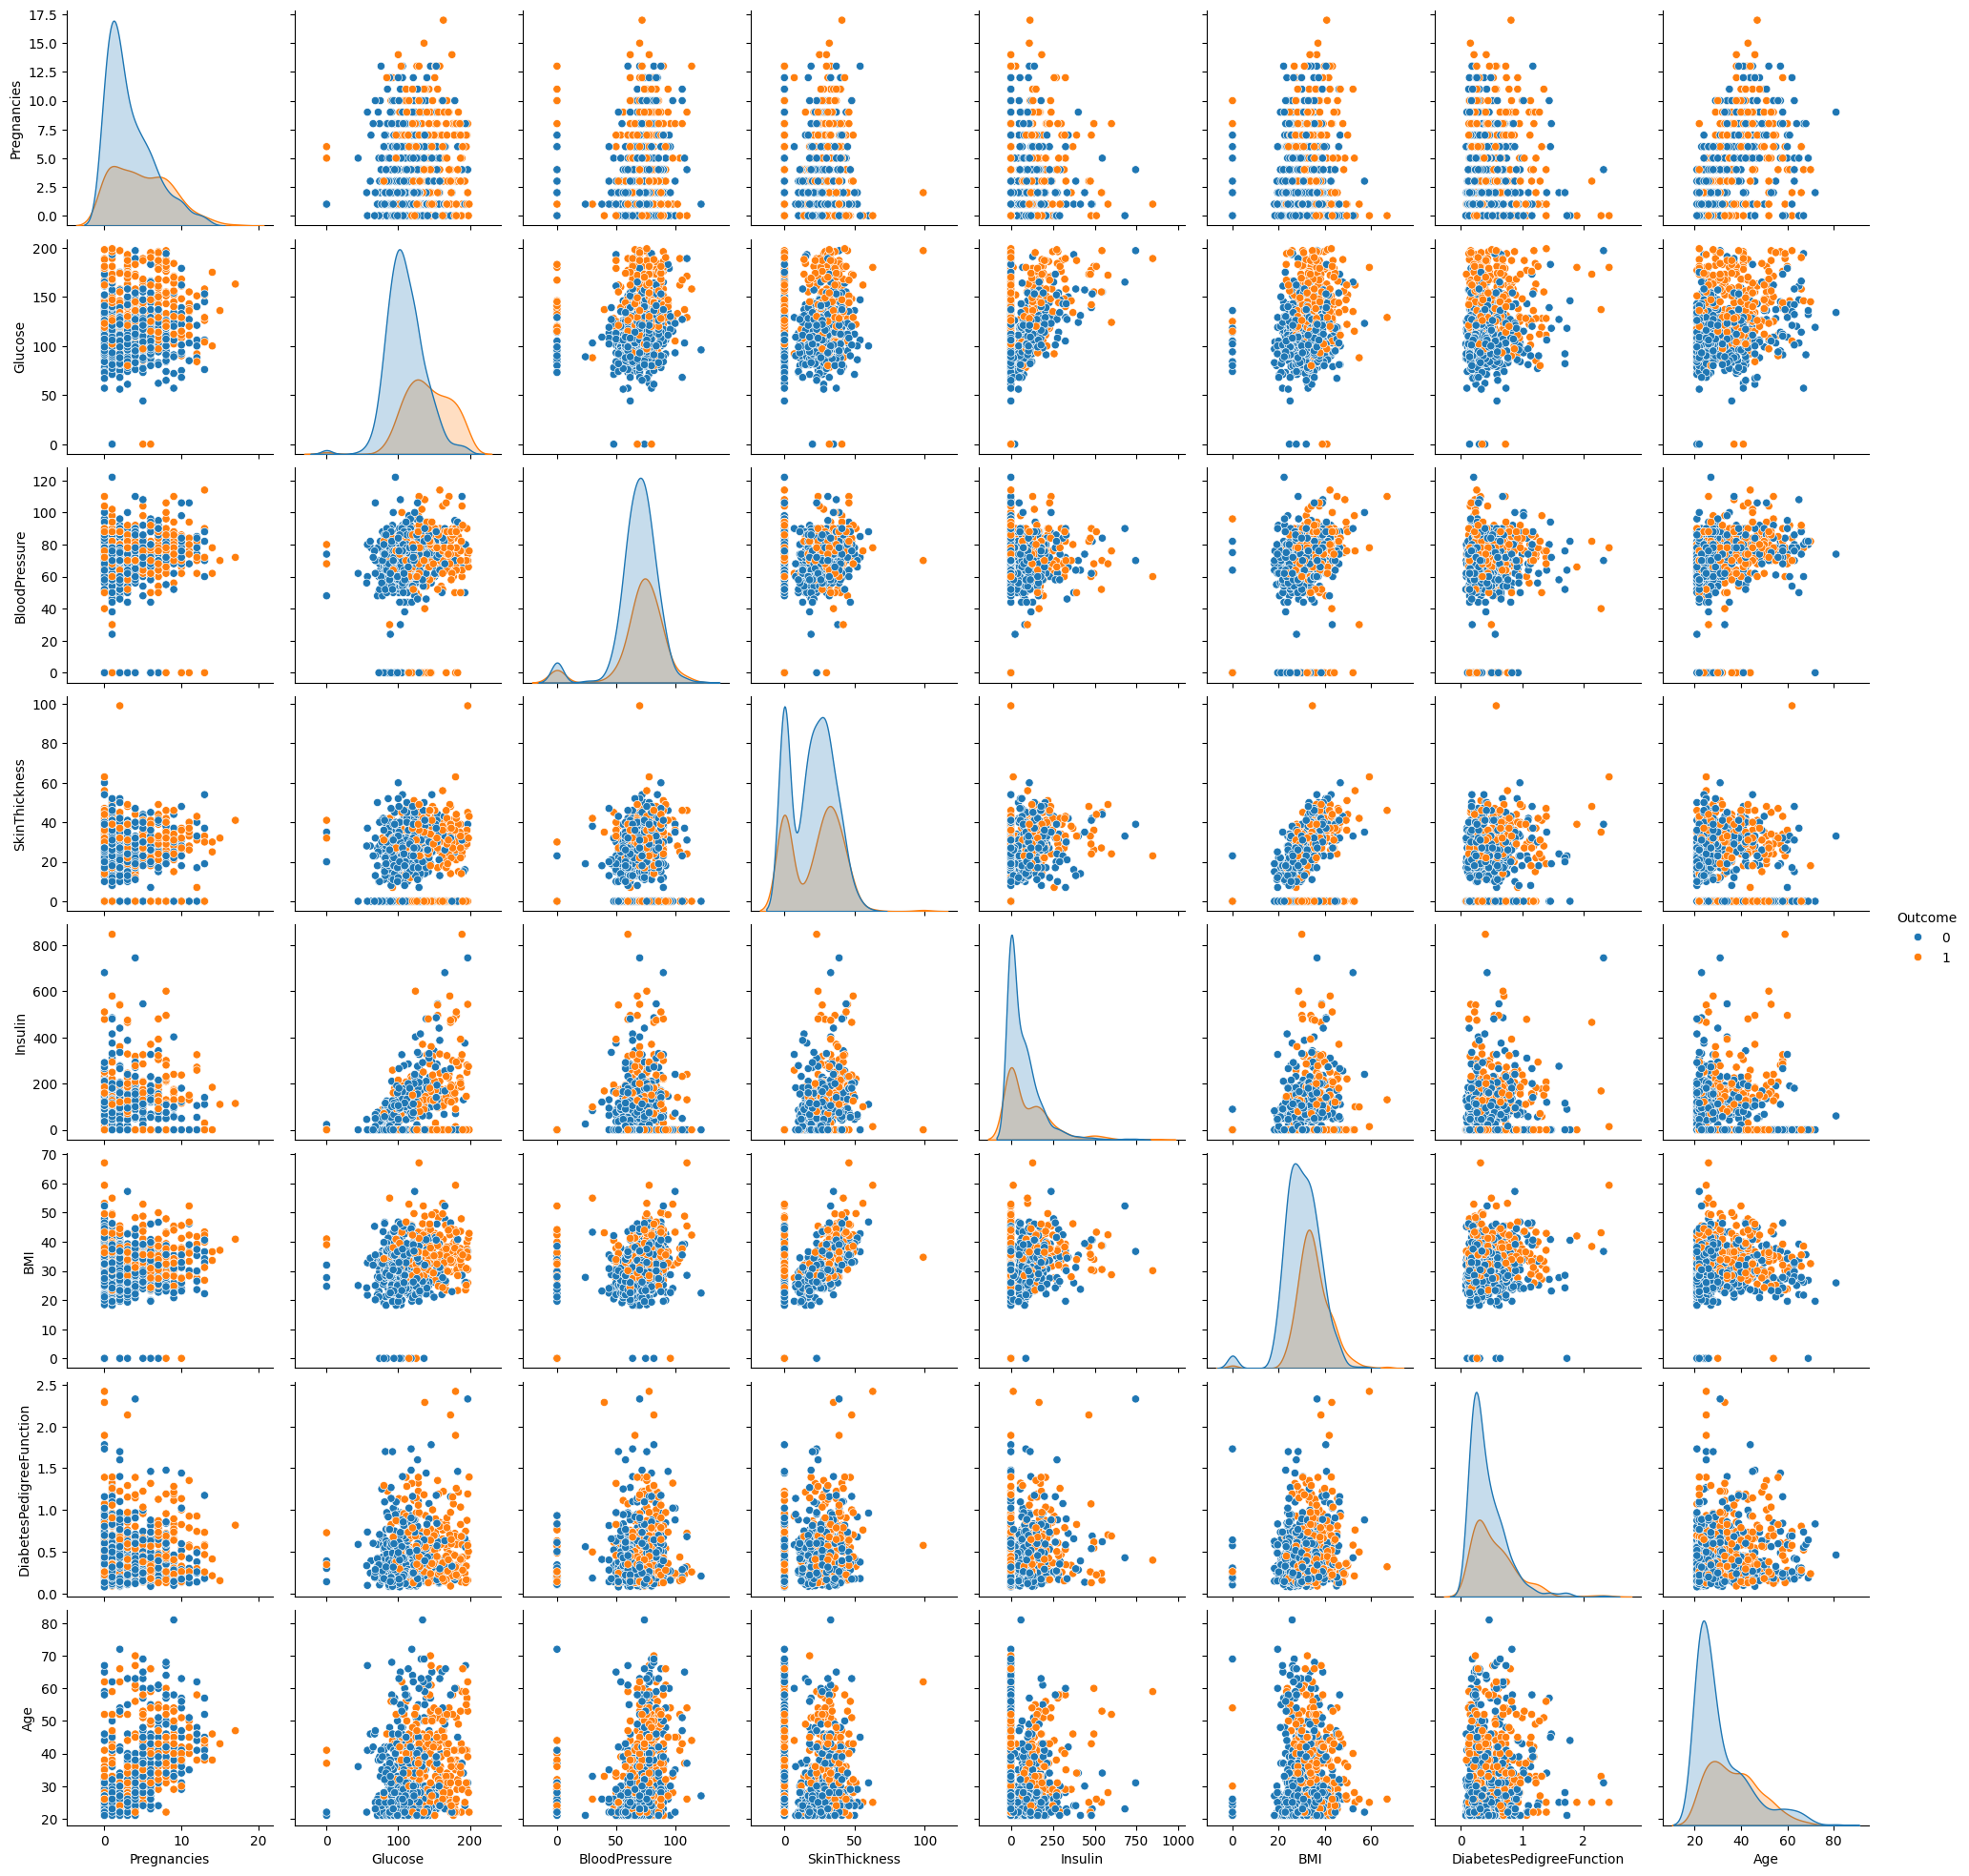

In [24]:
sns.pairplot(data = diabetes_dataset, hue='Outcome')
plt.show()

### Heatmap

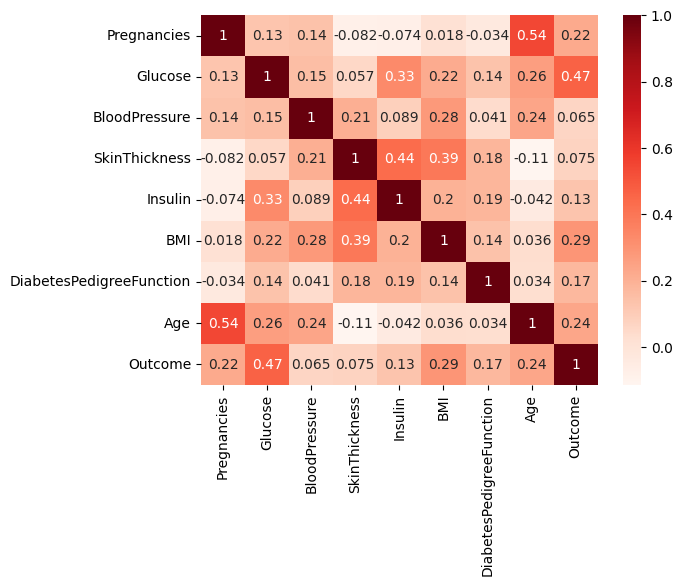

In [25]:
# Correlation matrix graph
sns.heatmap(diabetes_dataset.corr(),cmap="Reds",annot=True)
plt.show()

In [26]:
# correlation coefficient gives us an idea of how strongly two variables are related to each other.
# correlation = 0 => zero correlation => the variables are related to each other
# correlation > 0 => positive correlation => while one variable increases, other one also increases
# correlation < 0 => negative correlation => while one variable increases, other one decreases.


# Data Preprocessing

In [27]:
diabetes_dataset_copy = diabetes_dataset.copy(deep=False)

### Handling Missing values

In [28]:
# Since there are zero values in the dataset for features like Glucose, BP, Skin-Thickness, 
# Insulin, BMI which doesn't make sense. So, we can treat them as missing values.
# Replacing zero values with NaN

In [29]:
diabetes_dataset_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_dataset_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [30]:
# check for the NaN values
diabetes_dataset_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


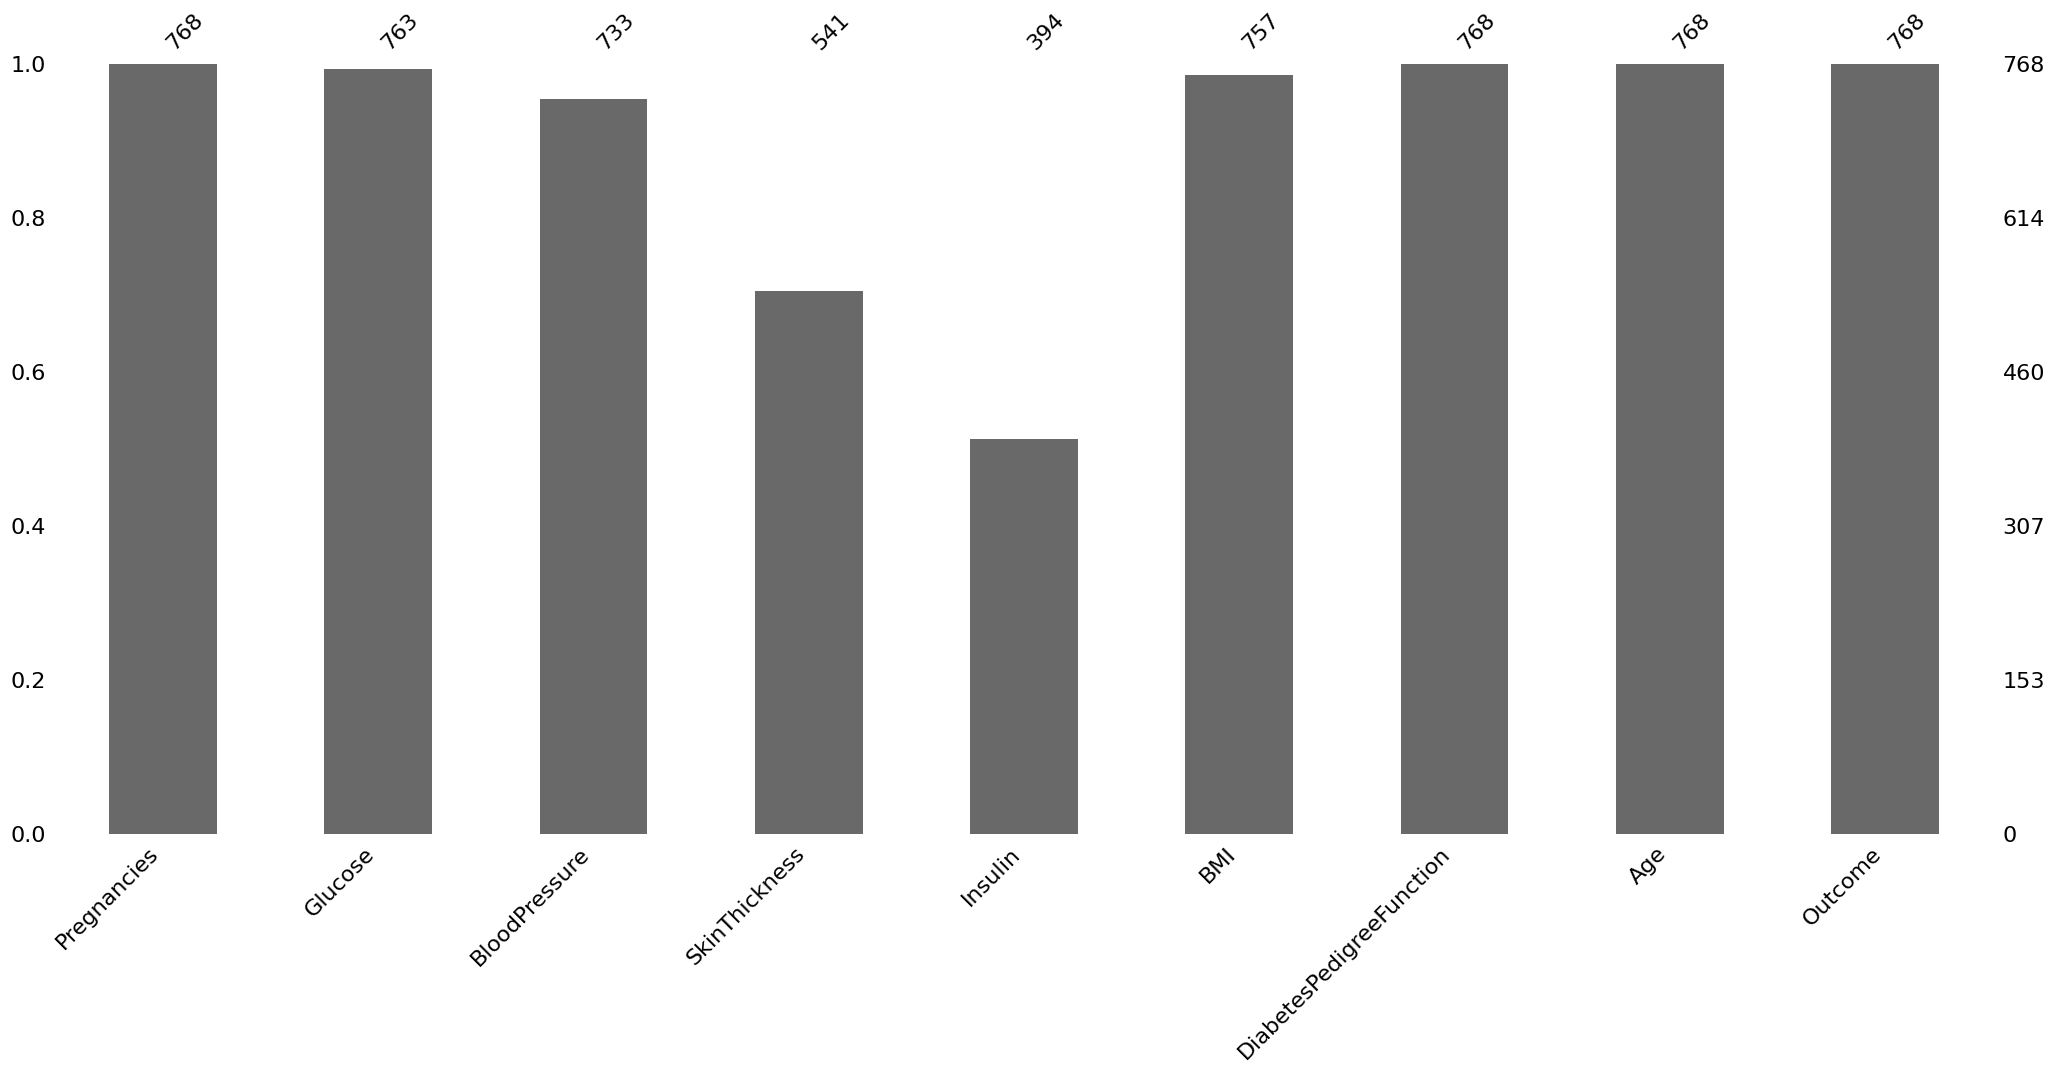

In [31]:
# visualizing the missing values using missingno library
!pip install missingno
import missingno as msno
msno.bar(diabetes_dataset_copy)
plt.show()

In [32]:
diabetes_dataset_copy.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   763.0  121.686763   30.535641  44.000  99.00000   
BloodPressure             733.0   72.405184   12.382158  24.000  64.00000   
SkinThickness             541.0   29.153420   10.476982   7.000  22.00000   
Insulin                   394.0  155.548223  118.775855  14.000  76.25000   
BMI                       757.0   32.457464    6.924988  18.200  27.50000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  141.00000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              29.0000   36.00000   99.00  
Insulin                   125.0000  190.00000  846.00  
BMI                        32.3000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [33]:
# After observing the statistical measurements, we came to the conclusion that the missing values needs to imputed with median.

In [34]:
# Replacing NaN with mean values
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns:
    diabetes_dataset_copy[column] = diabetes_dataset_copy.groupby('Outcome')[column].apply(lambda x: x.fillna(x.median())).reset_index(level=0, drop=True)

In [35]:
diabetes_dataset_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
diabetes_dataset_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [37]:
# missing values are filled

### Handling Outliers using IQR method

In [38]:
# IQR : Interquartile Range
# used when the distribution of data is skewed

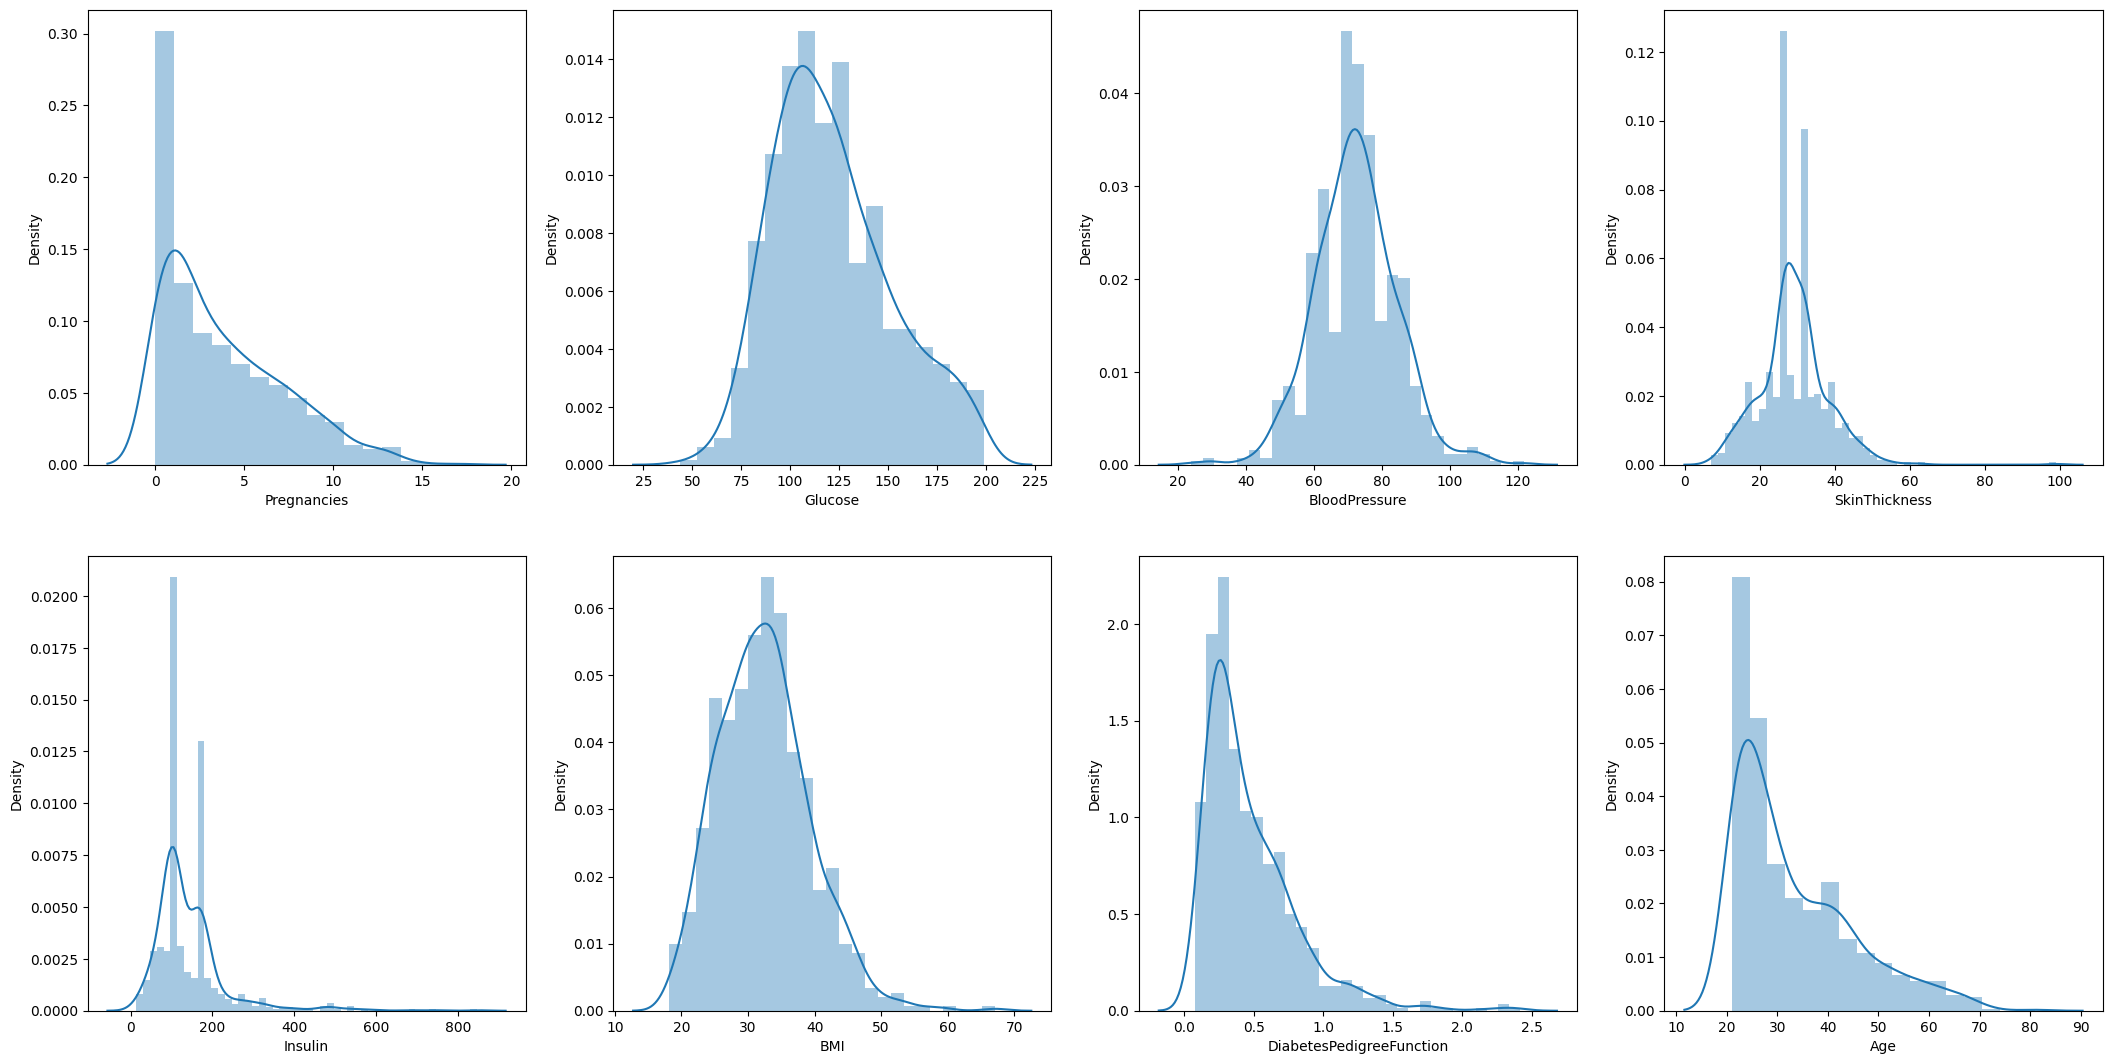

In [39]:
# distribution plot
plt.figure(figsize=(26,13))
for i in range(len(diabetes_dataset_copy.columns)-1):
    plt.subplot(2,4,i+1);
    sns.distplot(diabetes_dataset_copy.iloc[:,i]);

In [40]:
for i in range(len(diabetes_dataset_copy.columns)-1):
    column = diabetes_dataset_copy.columns[i]
    print(f'{column} : {diabetes_dataset_copy[column].skew()}')

Pregnancies : 0.9016739791518588
Glucose : 0.5323242439691904
BloodPressure : 0.1408302608013316
SkinThickness : 0.8174770535373308
Insulin : 3.028046221170265
BMI : 0.6064156081328272
DiabetesPedigreeFunction : 1.919911066307204
Age : 1.1295967011444805


In [41]:
diabetes_dataset_copy.describe().T

count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000    1.00000   
Glucose                   768.0  121.677083  30.464161  44.000   99.75000   
BloodPressure             768.0   72.389323  12.106039  24.000   64.00000   
SkinThickness             768.0   29.089844   8.890820   7.000   25.00000   
Insulin                   768.0  141.753906  89.100847  14.000  102.50000   
BMI                       768.0   32.434635   6.880498  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              28.0000   32.00000   99.00  
Insulin                   102.5000  169.50000  846.00  
BMI                        32.0500   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

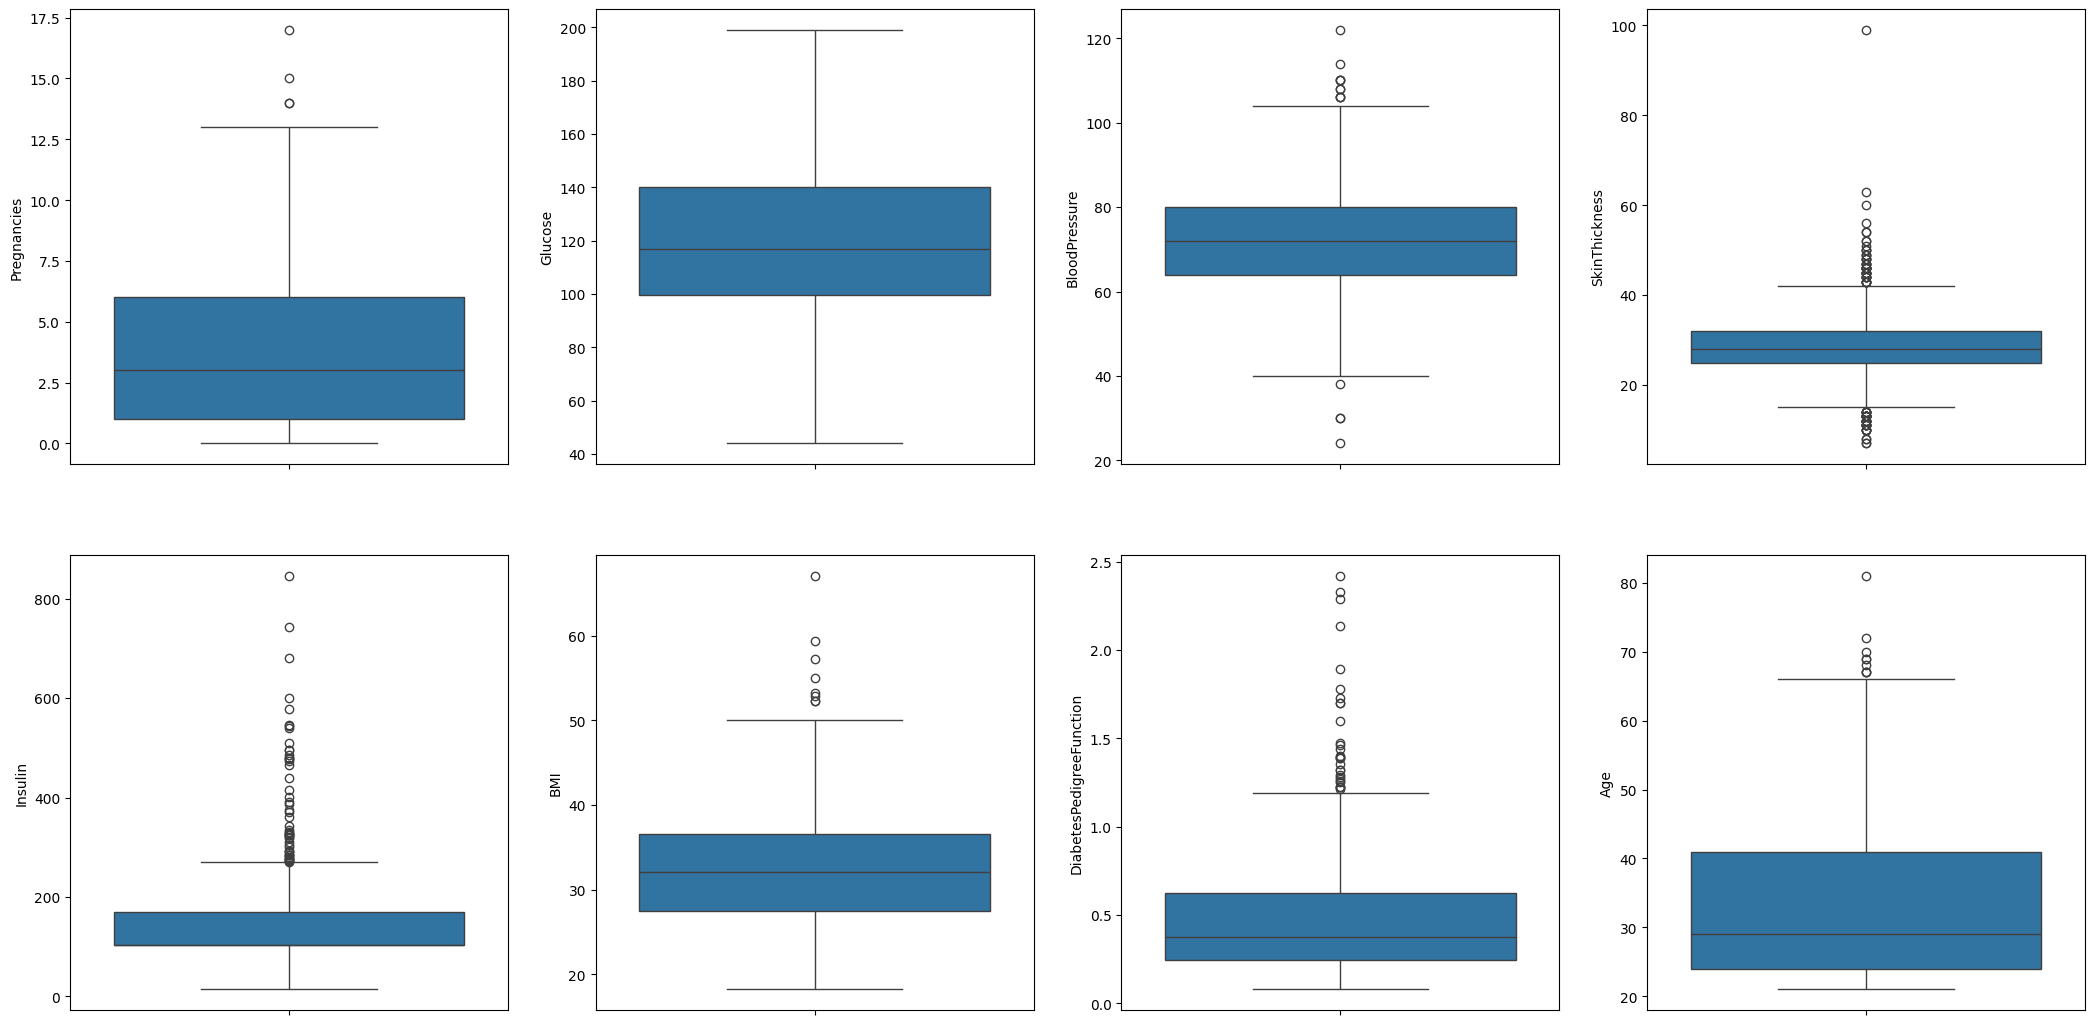

In [42]:
plt.figure(figsize=(26,13))
for i in range(len(diabetes_dataset_copy.columns)-1):
    plt.subplot(2,4,i+1);
    sns.boxplot(diabetes_dataset_copy.iloc[:,i]);

In [43]:
# detecting the outliers

columns = diabetes_dataset_copy.columns
columns = columns.drop('Outcome')

for column in columns:
    Q1 = diabetes_dataset_copy[column].quantile(0.25)
    Q3 = diabetes_dataset_copy[column].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1-1.5*IQR
    upper_limit = Q3+1.5*IQR

    if diabetes_dataset_copy[(diabetes_dataset_copy[column]>upper_limit)].any(axis=None) or diabetes_dataset_copy[(diabetes_dataset_copy[column]<lower_limit)].any(axis=None):
        print(f'{column} : yes')
    else:
        print(f'{column} : no')

Pregnancies : yes
Glucose : no
BloodPressure : yes
SkinThickness : yes
Insulin : yes
BMI : yes
DiabetesPedigreeFunction : yes
Age : yes


In [44]:
 # capping

columns = diabetes_dataset_copy.columns
columns = columns.drop('Outcome')

for column in columns:
    Q1 = diabetes_dataset_copy[column].quantile(0.25)
    Q3 = diabetes_dataset_copy[column].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1-1.5*IQR
    upper_limit = Q3+1.5*IQR

    if diabetes_dataset_copy[(diabetes_dataset_copy[column]>upper_limit)].any(axis=None):
        diabetes_dataset_copy.loc[diabetes_dataset_copy[column]>upper_limit,column]=upper_limit
    elif diabetes_dataset_copy[(diabetes_dataset_copy[column]<lower_limit)].any(axis=None):
        diabetes_dataset_copy.loc[diabetes_dataset_copy[column]<lower_limit,column]=lower_limit
        

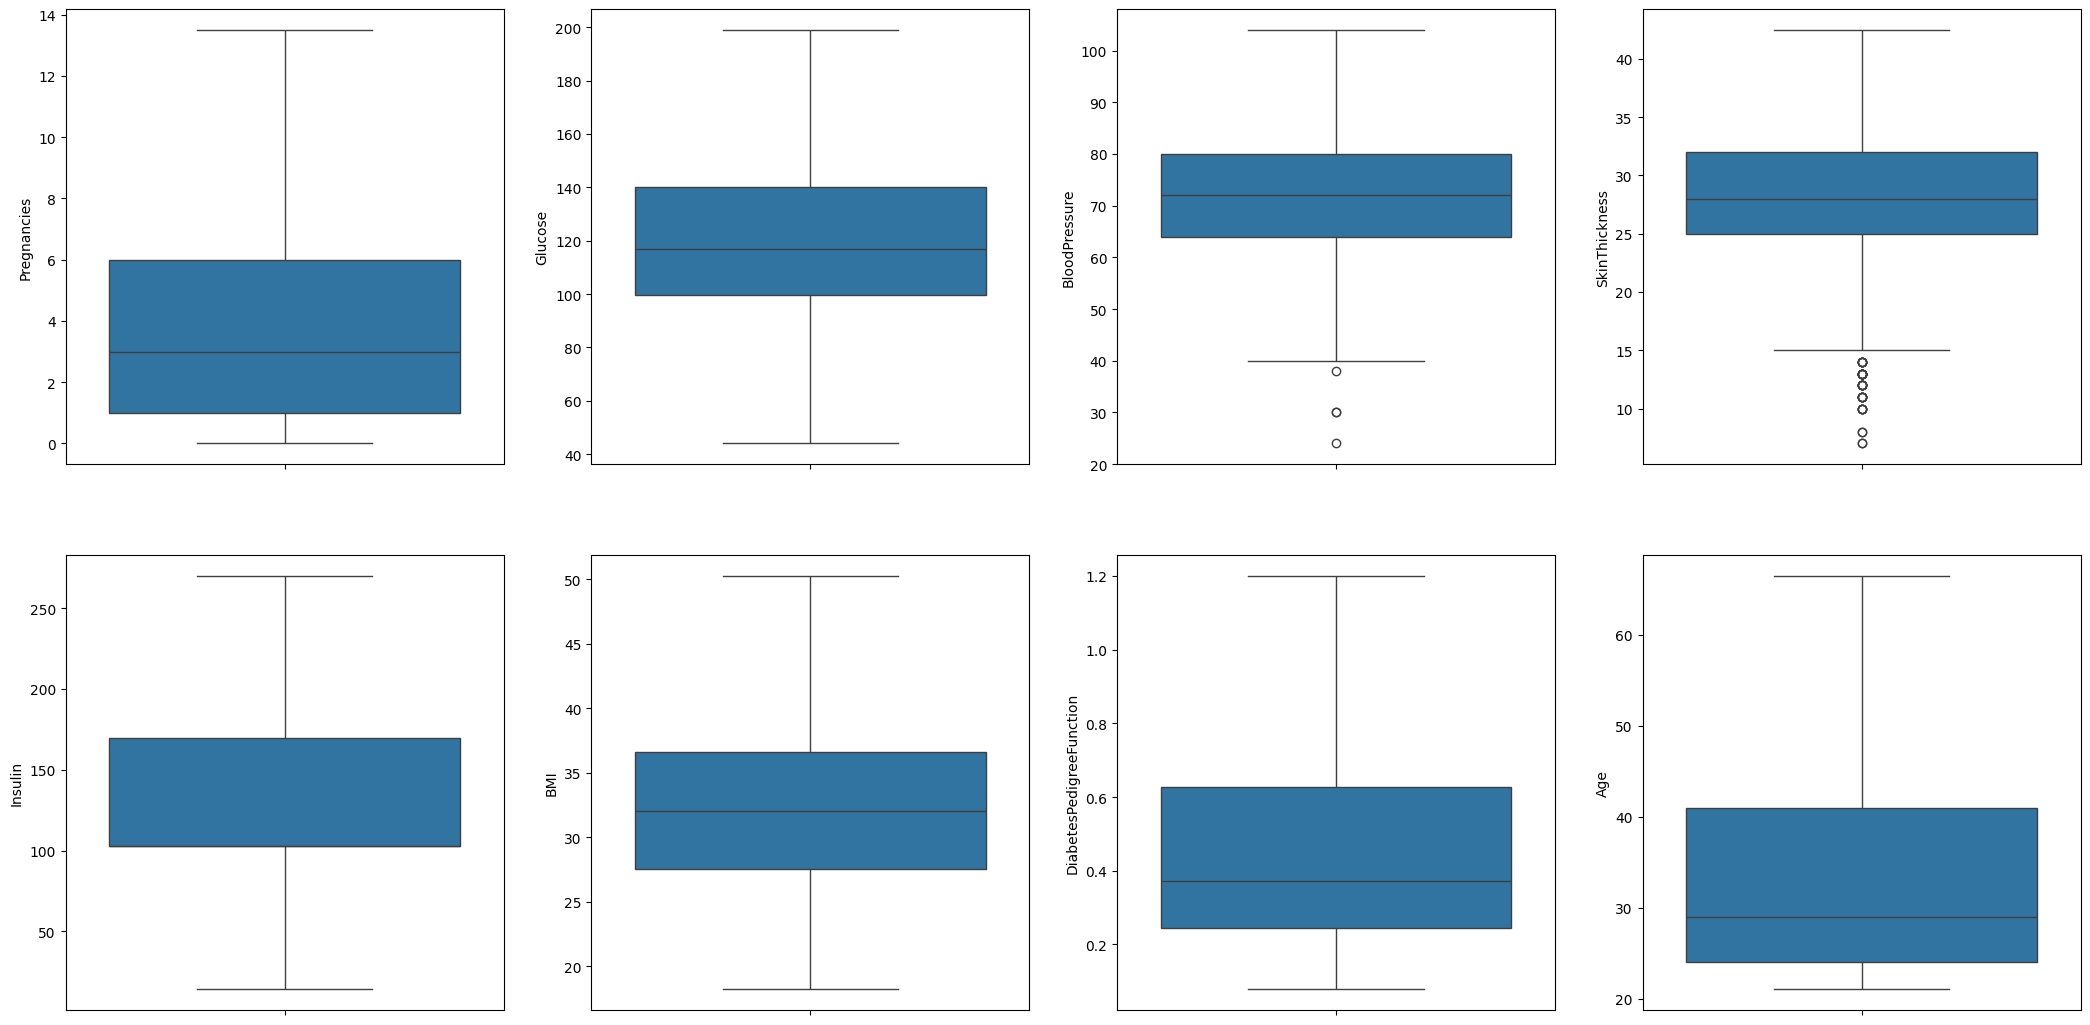

In [45]:
plt.figure(figsize=(26,13))
for i in range(len(diabetes_dataset_copy.columns)-1):
    plt.subplot(2,4,i+1);
    sns.boxplot(diabetes_dataset_copy.iloc[:,i]);

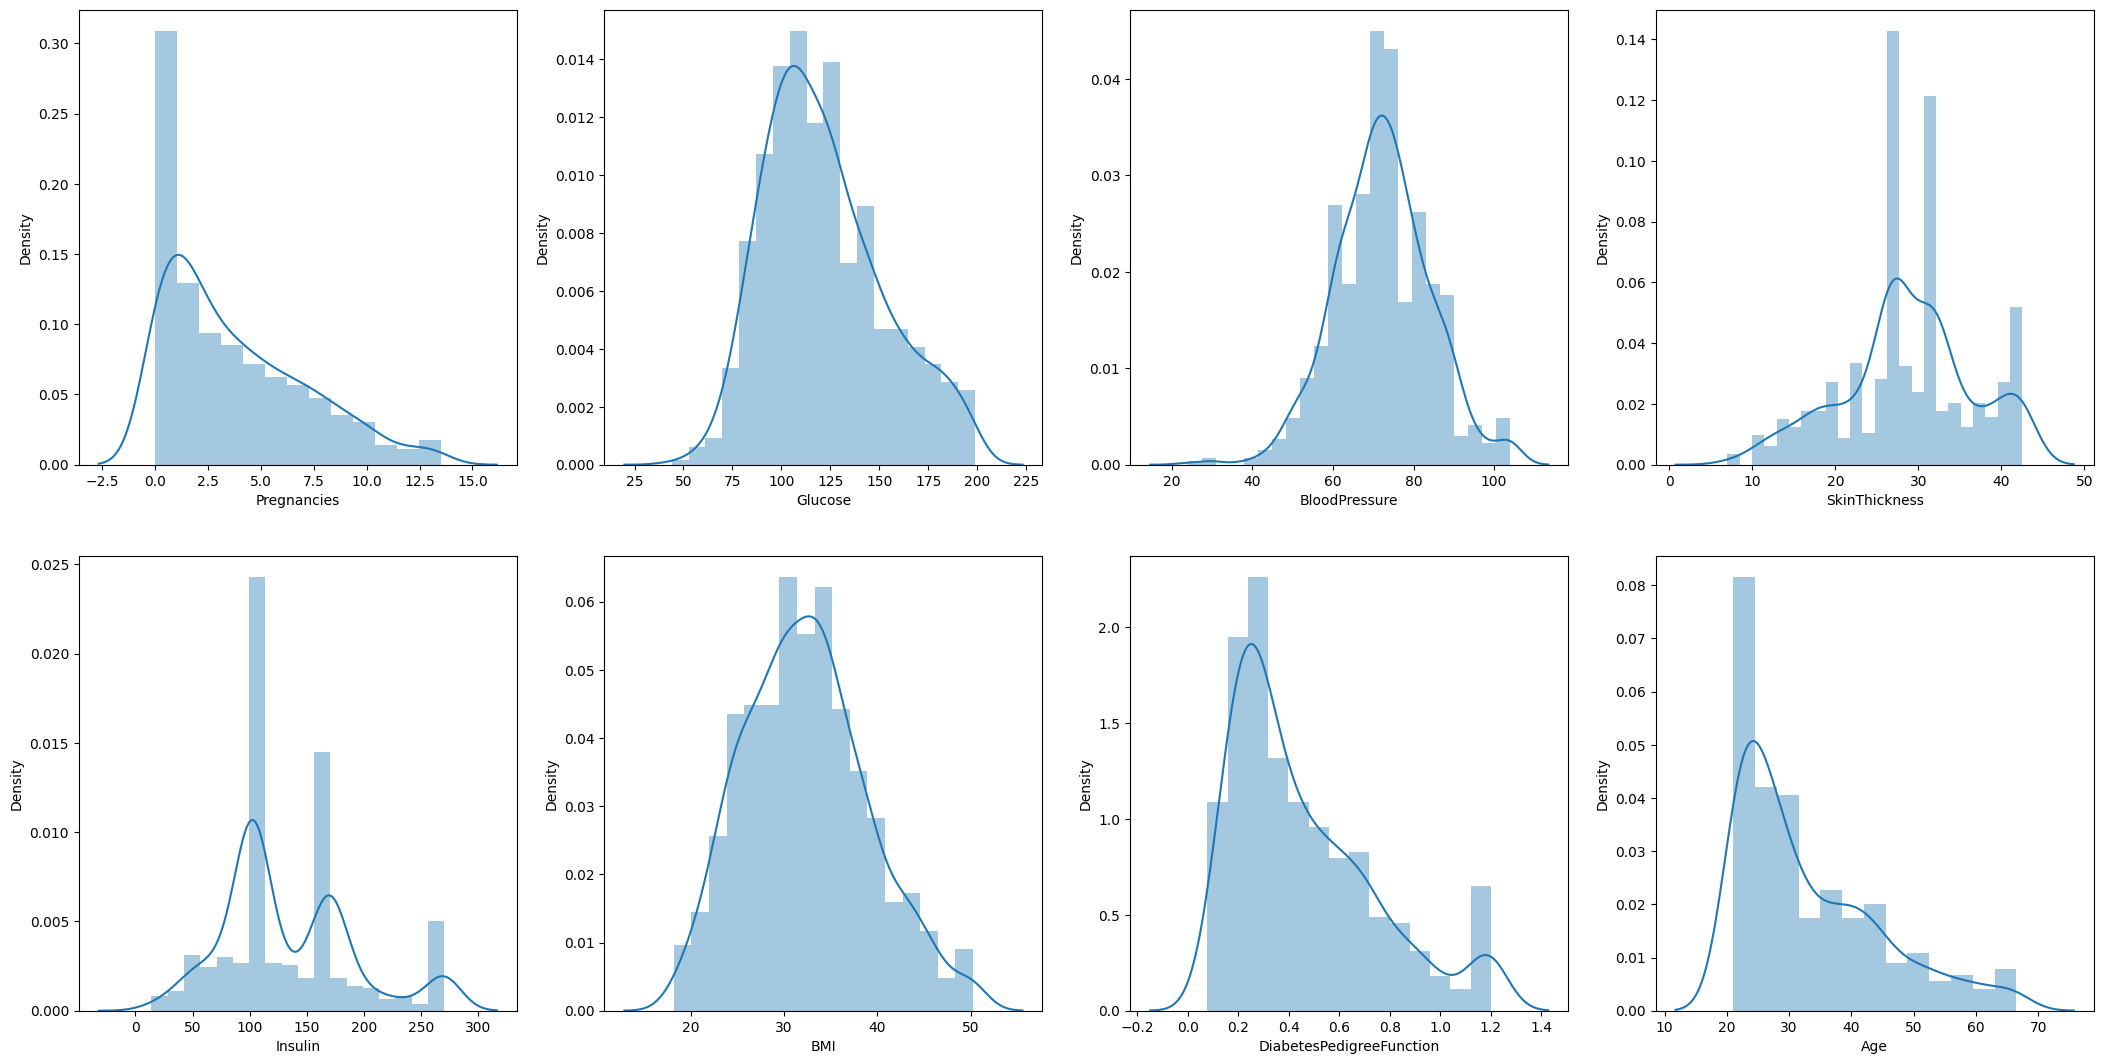

In [46]:
plt.figure(figsize=(26,13))
for i in range(len(diabetes_dataset_copy.columns)-1):
    plt.subplot(2,4,i+1);
    sns.distplot(diabetes_dataset_copy.iloc[:,i]);

In [47]:
diabetes_dataset_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                     1.200  33.0        1

# Train Test Split

In [48]:
X = diabetes_dataset_copy.drop('Outcome',axis=1)
Y = diabetes_dataset_copy['Outcome']

In [49]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    169.5  33.6   
1            1.0     85.0           66.0           29.0    102.5  26.6   
2            8.0    183.0           64.0           32.0    169.5  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           42.5    180.0  32.9   
764          2.0    122.0           70.0           27.0    102.5  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           32.0    169.5  30.1   
767          1.0     93.0           70.0           31.0    102.5  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  
1                       0.351  31.0

In [50]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [51]:
# Splitting data in train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [52]:
# Checking the dimensions
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [53]:
print(Y.shape,Y_train.shape,Y_test.shape)

(768,) (614,) (154,)


# Data Standardization

In [54]:
# standardizing data after test train split prevents data leakage
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform (X_test)

# Data Modelling

### SVM

In [55]:
# Support Vector Classifier
svc = SVC(kernel='linear',random_state=123)
# training the svm classifier
svc.fit(X_train,Y_train)

SVC(kernel='linear', random_state=123)

### Naive Bayes

In [56]:
# Naive Bayes Algorithm
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

### Logistic Regression

In [57]:
# Logistic Regression Algorithm
logReg = LogisticRegression(random_state=123)
logReg.fit(X_train,Y_train)

LogisticRegression(random_state=123)

### KNN

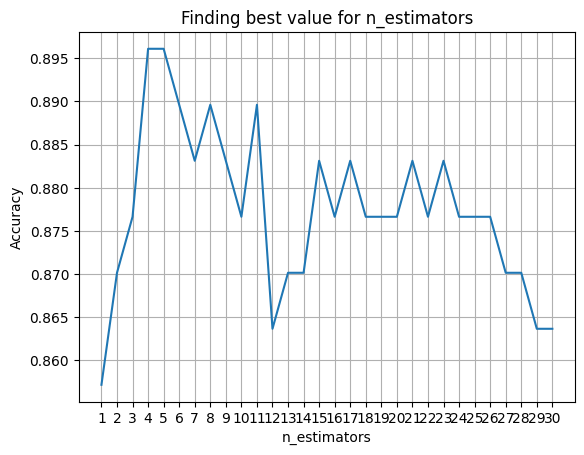

Highest value:  0.8961038961038961


In [58]:
# finding best value for n_estimators

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc._append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [59]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=11)

### Decision Tree

In [60]:
cart = DecisionTreeClassifier(criterion = 'entropy',random_state=123)
cart.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=123)

### Random Forest

In [61]:
rfc = RandomForestClassifier(n_estimators = 11, criterion = 'entropy',random_state=123)
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=123)

### Gradient Boosting Classifier

In [62]:
xgb = GradientBoostingClassifier(random_state = 123)
xgb.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=123)

### LGBM Classifier

In [63]:
!pip install lightgbm


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(random_state = 12345)
lgbmc.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 646
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(random_state=12345)

# Model Evaluation

In [66]:
# making predictions on test dataset
Y_pred_logReg = logReg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_cart = cart.predict(X_test)
Y_pred_rfc = rfc.predict(X_test)
Y_pred_xgb = xgb.predict(X_test)
Y_pred_lgbmc = lgbmc.predict(X_test)

In [68]:
# finding accuracy score for each predictions
accuracy_logReg = accuracy_score(Y_test, Y_pred_logReg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_cart = accuracy_score(Y_test, Y_pred_cart)
accuracy_rfc = accuracy_score(Y_test, Y_pred_rfc)
accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)
accuracy_lgbmc = accuracy_score(Y_test, Y_pred_lgbmc)

In [69]:
# printing accuracy score
print("Logistic Regression: " + str(accuracy_logReg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_cart * 100))
print("Random Forest: " + str(accuracy_rfc * 100))
print("Gradient Boosting: "+ str(accuracy_xgb*100))
print("LGBM: "+str(accuracy_lgbmc*100))

Logistic Regression: 78.57142857142857
K Nearest neighbors: 88.96103896103897
Support Vector Classifier: 77.27272727272727
Naive Bayes: 75.97402597402598
Decision tree: 87.01298701298701
Random Forest: 88.31168831168831
Gradient Boosting: 90.9090909090909
LGBM: 88.31168831168831


In [70]:
# Hence Gradient Boosting model has the highest accuracy score of 90.9%

In [71]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_pred_xgb)
print(conf_mat)

[[96  4]
 [10 44]]


<Axes: >

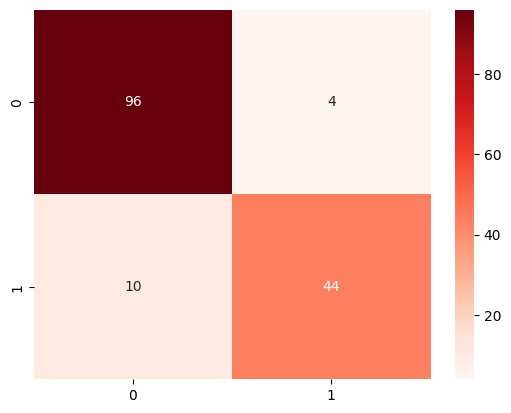

In [72]:
# plot the Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(conf_mat), cmap='Reds', annot=True)

In [73]:
# Classification Report
print(classification_report(Y_test, Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       100
           1       0.92      0.81      0.86        54

    accuracy                           0.91       154
   macro avg       0.91      0.89      0.90       154
weighted avg       0.91      0.91      0.91       154



# Hyperparameter Tuning

In [74]:
parameters = {
                "learning_rate": [0.01, 0.1, 0.2, 1],
                "max_depth":[3,5,8],
                "subsample":[0.5, 0.9, 1.0],
                "n_estimators": [100,1000]
             }


In [75]:
gbc = GradientBoostingClassifier(random_state=123)

In [76]:
from sklearn.model_selection import GridSearchCV
grid_GBC = GridSearchCV(estimator=gbc, param_grid = parameters, cv = 10, n_jobs=-1)
grid_GBC.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 1],
                         'max_depth': [3, 5, 8], 'n_estimators': [100, 1000],
                         'subsample': [0.5, 0.9, 1.0]})

In [77]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBC.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.01, random_state=123, subsample=0.5)

 The best score across ALL searched params:
 0.8810682178741407

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}


# Saving the trained model

In [78]:
import pickle
filename = 'diabetes_model.pkl'
pickle.dump(xgb,open(filename,'wb'))

In [79]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.pkl','rb'));

In [80]:
# prediction
prediction = loaded_model.predict([[6,148.0,72.0,35.0,169.5,33.6,0.627,50]])
print(prediction)

[1]
